In [350]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import time

import scipy as sp
import scipy.stats as stats
from scipy import stats
from scipy.stats import norm


In [475]:
# conda install -c anaconda pandas-datareader
from pandas_datareader import data, wb

In [476]:
# pip install bs4
from bs4 import BeautifulSoup
import requests

In [4]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

In [5]:
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

In [6]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('INPX', 'google', start_date, end_date)

NotImplementedError: data_source='google' is not implemented

In [10]:
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb

ticker = 'GOOGL'
start_date = '2015-01-01'
end_date = '2019-10-31'
data_source = 'yahoo'

# get stock prices
ticker_data=wb.DataReader(ticker, data_source=data_source, start=start_date, end=end_date)
df = pd.DataFrame(ticker_data)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,535.799988,527.880005,532.599976,529.549988,1324000,529.549988
2015-01-05,527.989990,517.750000,527.150024,519.460022,2059100,519.460022
2015-01-06,521.210022,505.549988,520.500000,506.640015,2722800,506.640015
2015-01-07,511.489990,503.649994,510.950012,505.149994,2345900,505.149994
2015-01-08,507.500000,495.019989,501.510010,506.910004,3652700,506.910004
...,...,...,...,...,...,...
2019-10-25,1268.000000,1249.150024,1252.000000,1264.300049,1352200,1264.300049
2019-10-28,1299.239990,1272.310059,1275.000000,1288.979980,3271400,1288.979980
2019-10-29,1280.800049,1255.609985,1276.000000,1260.660034,2622500,1260.660034


In [473]:
from pandas_datareader import Options

# >>> aapl = Options('AAPL')
# FutureWarning: Options(symbol) is deprecated, use Options(symbol, data_source) instead
#                after removing the cwd from sys.path.

# >>> aapl = Options('AAPL', 'google')
# NotImplementedError: currently only yahoo supported

# >>> aapl = Options('AAPL', 'yahoo')
# ImmediateDeprecationError: 
# Yahoo Options has been immediately deprecated due to large breaks in the API without the
# introduction of a stable replacement. Pull Requests to re-enable these data
# connectors are welcome.

# >>> puts, calls = appl.get_options_data()

In [485]:
# pip install yahoo-finance
# >>> from yahoo_finance import Options

In [479]:
# This fetches the page’s full HTML content
data_url = "https://finance.yahoo.com/quote/SPY/options"
data_html = requests.get(data_url).content

In [483]:
# BeautifulSoup is the perfect tool for working with HTML data in Python.
content = BeautifulSoup(data_html, "html.parser")
options_tables = content.find_all("table")

In [484]:
# Break it down into two tables, for calls and puts
options_tables = [] 
tables = content.find_all("table")
for i in range(len(content.find_all("table"))):
    options_tables.append(tables[i])

In [486]:
# Yahoo’s data contains options that are pretty deep in- and out-of-the-money, 
# which might be great for certain purposes. 
# calls
calls = options_tables[0].find_all("tr")[1:] # first row is header
# puts
puts = options_tables[1].find_all("tr")[1:]  # first row is header

In [ ]:
# Let’s find these, using BeautifulSoup and Yahoo’s differential table entries for in-the-money and out-of-the-money options:

In [217]:
itm_calls = []
otm_calls = []

itm_puts = []
otm_puts = []
for call_option in calls:
    if "in-the-money" in str(call_option):  
        itm_calls.append(call_option)
    else:
        otm_calls.append(call_option)
for put_option in puts:
    if "in-the-money" in str(put_option):
        itm_puts.append(put_option)
    else:
        otm_puts.append(put_option)

In [324]:
def options5(put_call, moneyness):
    moneyness = moneyness.upper()
    put_call = put_call.upper()
    
    # SPDR S&P 500 ETF (SPY)
    data_url = "https://finance.yahoo.com/quote/SPY/options"
    data_html = requests.get(data_url).content
    content = BeautifulSoup(data_html, "html.parser")
    tables = [v for v in content.find_all("table")]
    
    if put_call == "C":
        t = tables[0].find_all("tr")[1:]
    elif put_call == "P":
        t = tables[1].find_all("tr")[1:]
    
    if moneyness == "ITM":
        g = [option for option in t if "in-the-money" in str(option)]
    elif moneyness == "OTM":
        g = [option for option in t if not "in-the-money" in str(option)]

    x = [[td.text for td in BeautifulSoup(str(opt), "html.parser").find_all("td")] for opt in g]        
    header = ['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid', 'Ask', 
              'Change', 'Change (%)', 'Volume', 'Open Interest', 'Implied Volatility']
    return pd.DataFrame(data=x, columns=header)
print(len(options5("C", "ITM")))

57


In [337]:
def options6(put_call):
    # moneyness = moneyness.upper()
    put_call = put_call.upper()
    
    # SPDR S&P 500 ETF (SPY)
    data_url = "https://finance.yahoo.com/quote/SPY/options"
    data_html = requests.get(data_url).content
    content = BeautifulSoup(data_html, "html.parser")
    tables = [v for v in content.find_all("table")]
    
    g = [option for t in tables for option in t.find_all("tr")[1:]]

    x = [[td.text for td in BeautifulSoup(str(opt), "html.parser").find_all("td")] for opt in g]        
    header = ['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid', 'Ask', 
              'Change', 'Change (%)', 'Volume', 'Open Interest', 'Implied Volatility']
    return pd.DataFrame(data=x, columns=header)
print(len(options6("C")))

121


In [408]:
def options8(underlying, date=[]):
    
    if date == [] or date == "":
        z = ""
    else:
        if type(date) == dt.datetime:
            date = date.date()
        elif type(date) == str or type(date) == int:
            date = dt.datetime.strptime(str(date), "%Y%m%d")
            print(date)
        time_stamp = int(date.replace(tzinfo=datetime.timezone.utc).timestamp())
            #date = dt.datetime.strptime(date,"%Y%m%d").date()
        # date_stamp = str(int(time.mktime(date.timetuple())))
        z = "?date=" + str(time_stamp)
    # moneyness = moneyness.upper()
    # put_call = put_call.upper()
    
    # ^ = "5E" -- honnan jön a % jel ?
    underlying = underlying.replace("^","%5E")
    # data_url = "https://finance.yahoo.com/quote/" + underlying + "/options"
    
    data_url = "https://finance.yahoo.com/quote/" + underlying + "/options" + z
    print(data_url)
    # NASDAQ Composite (^IXIC)
    # SPDR S&P 500 ETF (SPY)
    # CBOE Volatility Index (^VIX)
    # FTSE 100 (^FTSE)
    # Nikkei 225 (^N225)
    data_html = requests.get(data_url).content
    content = BeautifulSoup(data_html, "html.parser")
    
    g = [o for t in [v for v in content.find_all("table")] for o in t.find_all("tr")[1:]]
    x = [[td.text for td in BeautifulSoup(str(opt), "html.parser").find_all("td")] for opt in g]
    
    header = ['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid', 'Ask', 
              'Change', 'Change (%)', 'Volume', 'Open Interest', 'Implied Volatility']
    return pd.DataFrame(data=x, columns=header)

In [569]:
def options9(underlying, date=[]):
    if date == [] or date == "":
        z = ""
    else:
        if type(date) == dt.datetime:
            # date = date.date()
            s = dt.datetime.strftime(date, "%Y%m%d")
        elif type(date) == str or type(date) == int:
            s = str(date)   
        time_stamp = int(dt.datetime.strptime(s, "%Y%m%d").replace(tzinfo=datetime.timezone.utc).timestamp())
        #time_stamp = int(dt.datetime.strptime(str(s), "%Y%m%d").replace(tzinfo=datetime.timezone.utc).timestamp())
        
        z = "?date=" + str(time_stamp)
    
    # ^ = "5E" -- honnan jön a % jel ?
    underlying = underlying.replace("^","%5E")
    data_url = "https://finance.yahoo.com/quote/" + underlying + "/options" + z
    data_html = requests.get(data_url).content
    content = BeautifulSoup(data_html, "html.parser")
    
    g = [o for t in [v for v in content.find_all("table")] for o in t.find_all("tr")[1:]]
    x = [[td.text for td in BeautifulSoup(str(opt), "html.parser").find_all("td")] for opt in g]
    
    header = ['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid', 'Ask', 
              'Change', 'Change (%)', 'Volume', 'Open Interest', 'Implied Volatility']
    df = pd.DataFrame(data=x, columns=header)
    df.insert(0, "Expiry Date", date)
    if len(df) > 0:
        print(date.date())
        print(data_url)
        print(len(df))
        
    return df

In [487]:
def options(ticker):
    # ^ = "5E" -- honnan jön a % jel ?
    # VIX Dec Futures Index (^VIXDEC)
    # VIX Nov Futures Index (^VIXNOV) ...
    ticker = ticker.replace("^","%5E")
    
    data_url = "https://finance.yahoo.com/quote/" + ticker + "/options"
    data_html = requests.get(data_url).content
    r = str(BeautifulSoup(data_html, "html.parser"))
    r=r[r.index("OptionContracts-Proxy"):]
    r=r[r.index("expirationDates"):].split("[")[1].split("]")[0].split(",")
    df = pd.DataFrame([])
    header = ['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid', 'Ask', 
              'Change', 'Change (%)', 'Volume', 'Open Interest', 'Implied Volatility']
    for stamp in r:
        data_html1 = requests.get(data_url + "?date=" + stamp).content
        content = BeautifulSoup(data_html1, "html.parser")

        g = [o for t in [v for v in content.find_all("table")] for o in t.find_all("tr")[1:]]
        x = [[td.text for td in BeautifulSoup(str(opt), "html.parser").find_all("td")] for opt in g]
    
        df1 = pd.DataFrame(data=x, columns=header)
        df1.insert(0, "Expiry Date", dt.datetime.utcfromtimestamp(int(stamp)))
        df = pd.concat([df, df1])
    
    df.reset_index(drop=True, inplace=True)
    df["Expiry Date"] = pd.to_datetime(df["Expiry Date"], format="%Y-%m-%d")
    df["Option Type"] = df["Contract Name"].apply(lambda y : y[[i for (i, v) in enumerate([not z.isdigit() for z in y]) if v][-1]])
    df.drop(["Last Trade Date", "Bid", "Ask"], axis=1, inplace=True)
    # there are some "-" in Bid prices, Ask can be used (what changing if we remove "-" lines in Bid and recalc?)
    for x in ["Strike", "Last Price"]:
        df[x] = df[x].astype(np.float)
    return df

In [488]:
# test call
options("^VIX").head()

,Expiry Date,Contract Name,Strike,Last Price,Change,Change (%),Volume,Open Interest,Implied Volatility,Option Type
0,2019-11-06,VIXW191106C00010000,10.0,4.40,0.00,-,52,298,352.34%,C
1,2019-11-06,VIXW191106C00010500,10.5,3.20,0.00,-,4,54,271.09%,C
2,2019-11-06,VIXW191106C00011000,11.0,3.70,0.00,-,10,-,262.50%,C
3,2019-11-06,VIXW191106C00012000,12.0,0.69,-1.01,-59.41%,21,55,191.80%,C
4,2019-11-06,VIXW191106C00012500,12.5,0.80,-0.40,-33.33%,48,80,125.00%,C


In [136]:
# get the last charachter from a string (what is not a digit)
y = "VIXW191106C00010000"
b =[not z.isdigit() for z in y]
b
y[[i for (i, value) in enumerate([not z.isdigit() for z in y]) if value][-1]]

'C'

In [489]:
def stocks(ticker):

    ticker = ticker.replace("^","%5E")
    data_url = "https://finance.yahoo.com/quote/" + ticker + "/history"
    data_html = requests.get(data_url).content
    content = BeautifulSoup(data_html, "html.parser")
    g = [o for t in [v for v in content.find_all("table")] for o in t.find_all("tr")[1:-1]]
    x = [[td.text for td in BeautifulSoup(str(opt), "html.parser").find_all("td")] for opt in g]
    
    header = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
    df = pd.DataFrame(data=x, columns=header)
    # Date is in format Mar 04, 2019 (format="%b %d, %Y")--> it has to be converted to dataframe
    df["Date"] = pd.to_datetime(pd.to_datetime(df["Date"], format="%b %d, %Y"), format="%Y-%m-%d")
    
    for x in ["Open", "High", "Low", "Close", "Adj Close"]:
        df[x] = df[x].astype(np.float)
    
    return df

In [541]:
# test call
stocks("^VIX")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,12.68,13.13,12.44,12.83,12.83,-
1,2019-11-01,12.50,12.60,12.26,12.30,12.30,-
2,2019-10-31,13.51,13.95,13.18,13.22,13.22,-
3,2019-10-30,13.08,13.37,12.27,12.33,12.33,-
4,2019-10-29,13.16,13.52,13.07,13.20,13.20,-
...,...,...,...,...,...,...,...
95,2019-06-20,14.04,16.03,13.19,14.75,14.75,-
96,2019-06-19,15.05,15.71,14.15,14.33,14.33,-
97,2019-06-18,14.89,15.54,14.62,15.15,15.15,-
98,2019-06-17,15.65,15.76,15.24,15.35,15.35,-


In [493]:
norm.pdf(1)

0.24197072451914337

In [494]:
# normal cummulative distribution function
norm.cdf(0)

0.5

In [576]:
# norm.cdf is the cumulative distribution function of the standard normal distribution
# T-t is the time to maturity (expressed in years)
# S_{t} is the spot price of the underlying asset
# K is the strike price
# r is the risk free rate (annual rate, expressed in terms of continuous compounding)
# sigma  is the volatility of returns of the underlying asset

def BSoption_price(St, K, r, sigma, time_to_expiry, option_type):
    T=time_to_expiry
    t=0
    if sigma != 0:
        d1 = (np.log(St / K) + (r + (sigma ** 2) / 2) * (T - t)) / (sigma * np.sqrt(T - t))
        d2 = d1 - sigma * np.sqrt(T - t)
        if option_type == "C":
            price = norm.cdf(d1) * St - norm.cdf(d2) * K * np.exp(- r * (T - t))
        elif option_type == "P":
            price = - norm.cdf(-d1) * St + norm.cdf(-d2) * K * np.exp(- r * (T - t))
    else:
        if option_type == "C":
            price = np.max(St - K * np.exp(- r * (T - t)), 0)
        elif option_type == "P":
            price = np.min(St - K * np.exp(- r * (T - t)), 0)
    return price
    
            
def BSCall_price(St, K, r, sigma, time_to_expiry):
    T=time_to_expiry
    t=0
    d1 = (np.log(St / K) + (r + (sigma ** 2) / 2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = d1 - sigma * np.sqrt(T - t)
    price = norm.cdf(d1) * St - norm.cdf(d2) * K * np.exp(- r * (T - t))
    return price
def BSPut_price(St, K, r, sigma, time_to_expiry):
    T=time_to_expiry
    t=0
    d1 = (np.log(St / K) + (r + (sigma ** 2) / 2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = d1 - sigma * np.sqrt(T - t)
    price = - norm.cdf(-d1) * St + norm.cdf(-d2) * K * np.exp(- r * (T - t))
    return price

In [496]:
# test call
BSoption_price(100, 120, 0.1, 0.4, 0.3, "C")

3.3938124510035834

In [497]:
def implied_volatility(ticker):
    hist_stocks = stocks(ticker)
    
    
    today = dt.date.today()
    hist_stocks["Today"] = pd.to_datetime(today, format="%Y-%m-%d")
    #hist_stocks["Date"] = pd.to_datetime(hist_stocks["Date"], format="%Y-%m-%d")
    hist_stocks["Date Diff"] = hist_stocks["Today"] - hist_stocks["Date"]
    hist_stocks.sort_values(by="Date Diff", ascending=True,inplace=True)
    hist_stocks.reset_index(drop=True,inplace=True)
    # most recent stock price
    S=hist_stocks.loc[0, "Adj Close"]
    
    opts = options(ticker)
    #opts["Last Price"] = opts["Last Price"].astype(np.float)
    opts["Time to Expiry"] = (opts["Expiry Date"] - pd.to_datetime(today, format="%Y-%m-%d")).apply(lambda x : x.days)/252
    opts.drop(["Contract Name", "Change", "Change (%)", "Volume", "Open Interest"], axis=1, inplace=True)
       
    r=0
    Sigma = np.array(np.linspace(0,1,101)[1:])
    RMS = []
    for sigma in Sigma:
        x = np.vectorize(BSoption_price)(S, opts['Strike'], r, sigma, opts["Time to Expiry"], opts["Option Type"]) 
        rms = np.sqrt(np.mean(np.array(x - opts["Last Price"])**2)) # --> min by sigma
        RMS.append(rms)
    
    m=np.min(RMS)
    ind_m = RMS.index(m)
    implied_sigma = Sigma[ind_m]
    opts["Implied Price"] = np.vectorize(BSoption_price)(S, opts['Strike'], r, implied_sigma, 
                                                         opts["Time to Expiry"], opts["Option Type"]) 
    opts["Pricing Error"] = opts["Implied Price"] - opts["Last Price"]
    Ind=[i for (i, v) in enumerate(RMS) if v == m]
    Implied_Sigma = np.array(Sigma)
    Implied_Sigma = Implied_Sigma[Ind]
    Implied_Sigma_RMS = np.array(RMS)
    Implied_Sigma_RMS = Implied_Sigma_RMS[Ind]
    print(Implied_Sigma)
    print(Implied_Sigma_RMS)

    plot_volatility_smile(Sigma, RMS)
    plt.plot(Implied_Sigma, Implied_Sigma_RMS, "*r")
    return opts

[0.59]
[2.50941586]


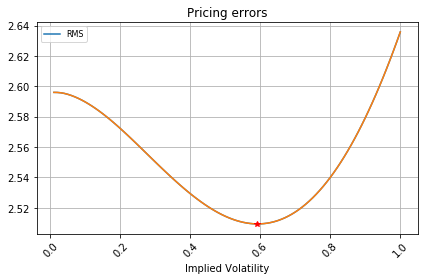

In [431]:
df = implied_volatility("^VIX")

[0.58]
[2.24943417]


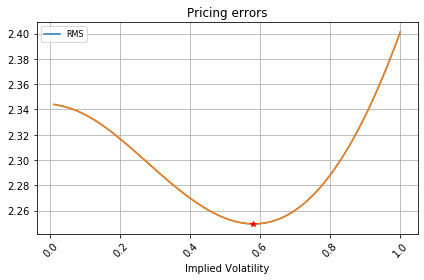

In [440]:
df = implied_volatility("^VIX")

[0.59]
[2.41304381]


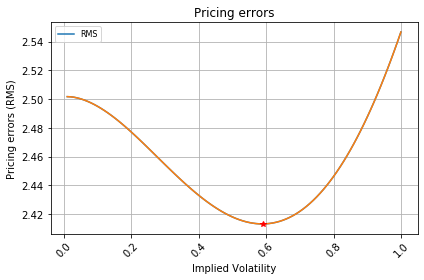

In [458]:
df = implied_volatility("^VIX")

[0.59]
[2.45028526]


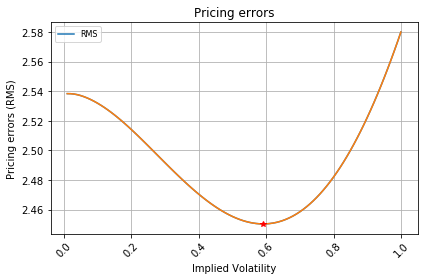

In [498]:
df = implied_volatility("^VIX")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


[0.59]
[2.21999505]


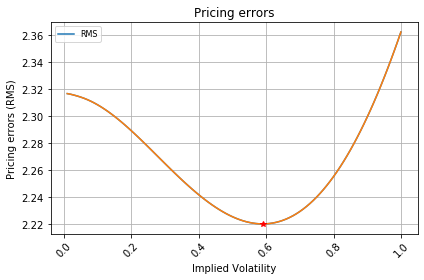

In [670]:
df = implied_volatility("^VIX")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


[0.61]
[2.3688186]


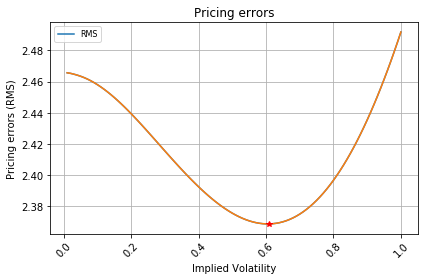

In [671]:
df = implied_volatility("^VIX")

[0.61]
[2.60689306]


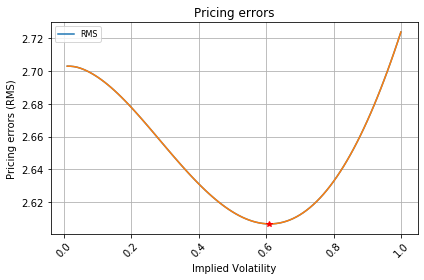

In [672]:
df = implied_volatility("^VIX")

[0.6]
[2.66150263]


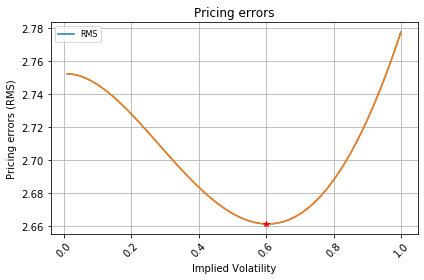

In [673]:
df = implied_volatility("^VIX")

In [438]:
df.sort_values(by=["Pricing Error"],ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

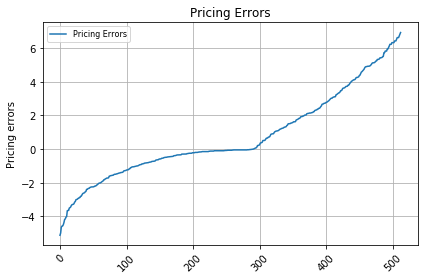

In [674]:
plot_pricing_errors(df)

In [596]:
def volatility_smile(df, ind=0, S=0):
    S = 12.83
    date=df.loc[0,"Expiry Date"]
    df1=df[df["Expiry Date"]==date]
    df1=df1[df1["Option Type"]=="P"]
    df1.sort_values(by="Strike", ascending=True, inplace=True)
    df1.reset_index(drop=True,inplace=True)
    r = 0
    Implied_Vol = []
    Implied_Price = []
    #print(len(df1.index))
    for i in [df1.index[ind]]:
        Sigma = np.array(np.linspace(0,0.3,100001)[1:])
        Error = []
        for sigma in Sigma:
            x = BSoption_price(S, df1.loc[i, 'Strike'], r, sigma, df1.loc[i, "Time to Expiry"], df1.loc[i, "Option Type"]) 
            error = np.abs(x - df1.loc[i, "Last Price"])
            Error.append(error)
        
        plt.plot(Sigma, Error)
        plt.grid()
        
        m=np.min(Error)
        print("minError:", m)
        Ind=[i for (i, v) in enumerate(Error) if v == m]
        print("Ind: ", Ind)
        print("Sigma[Ind]: ", Sigma[Ind])
        Implied_Sigma = Sigma[Ind]
        
        if len(Implied_Sigma)>1:
            print("multiple solutions for optimal implied volatility")
        implied_sigma = Implied_Sigma[0]
        print("implied_vol: ", implied_sigma)
        #p = BSoption_price(S, df1.loc[i, 'Strike'], r, implied_sigma, df1.loc[i, "Time to Expiry"], df1.loc[i, "Option Type"]) 
        
        #Implied_Price.append(p)
        #Implied_Vol.append(implied_sigma)
    #df1["Implied Volatility"] = Implied_Vol
    #df1["Implied Price"] = Implied_Price
    #df1["Pricing Error"] = df1["Implied Price"] - df1["Last Price"]
    
    #plt.plot(df1["Strike"], df1["Implied Volatility"])
    #plt.grid()
    #return df1

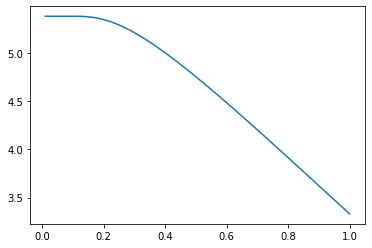

In [526]:
u = volatility_smile(df)

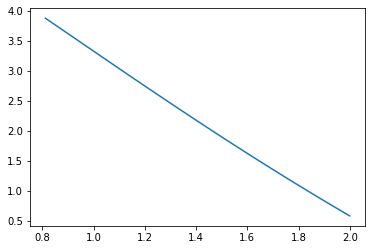

In [528]:
u = volatility_smile(df)

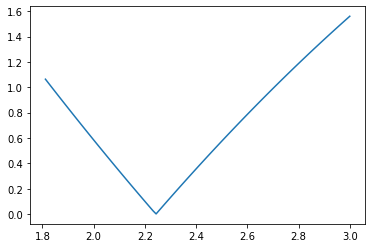

In [530]:
u = volatility_smile(df)

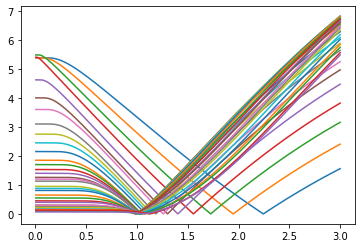

In [532]:
u = volatility_smile(df)

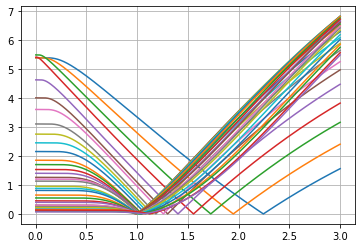

In [536]:
u = volatility_smile(df)

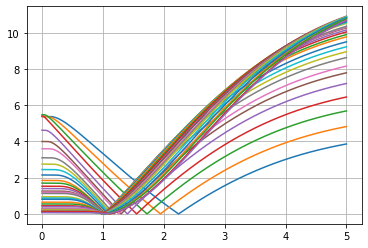

In [539]:
u = volatility_smile(df)

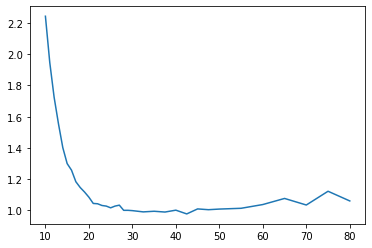

In [540]:
plt.plot(u["Strike"], u["Implied Volatility"])

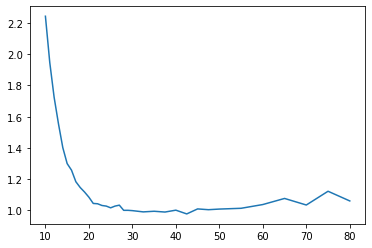

In [537]:
plt.plot(u["Strike"], u["Implied Volatility"])

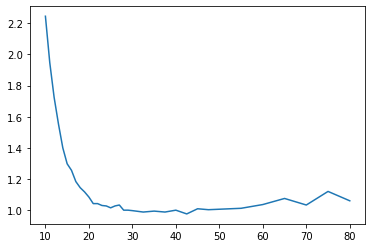

In [534]:
plt.plot(u["Strike"], u["Implied Volatility"])

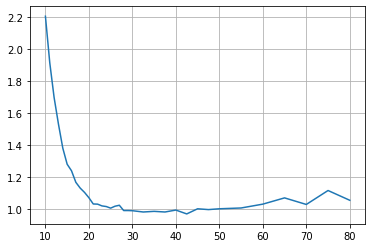

In [544]:
u = volatility_smile(df)

multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility


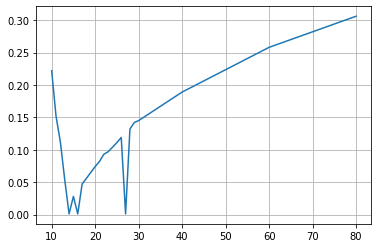

In [546]:
u = volatility_smile(df)

multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility


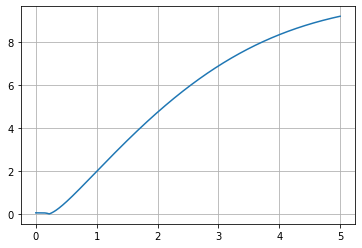

In [548]:
u = volatility_smile(df)

multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility
multiple solutions for optimal implied volatility


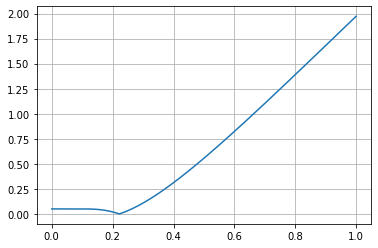

In [555]:
u = volatility_smile(df)

minError: 1.60867051404584e-05
[110]
0.2222


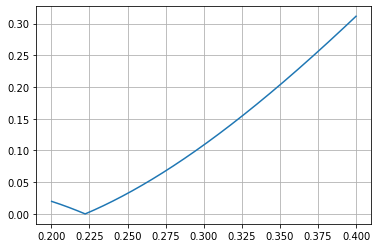

In [564]:
u = volatility_smile(df)

minError: 1.60867051404584e-05
Ind:  [2221]
Sigma[Ind]:  [0.2222]
implied_vol:  0.2222


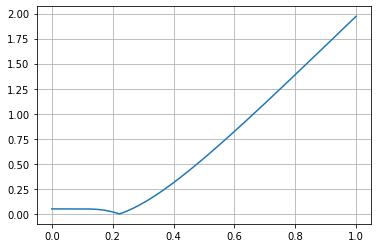

In [586]:
u = volatility_smile(df,0)

minError: 4.272955625990449e-05
Ind:  [1517]
Sigma[Ind]:  [0.1518]
implied_vol:  0.15180000000000002


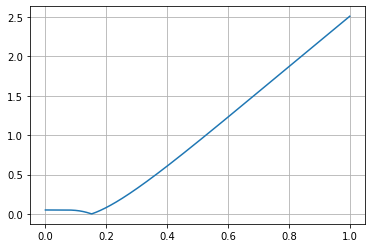

In [588]:
u = volatility_smile(df,1)

minError: 0.00012812650563531758
Ind:  [1123]
Sigma[Ind]:  [0.1124]
implied_vol:  0.1124


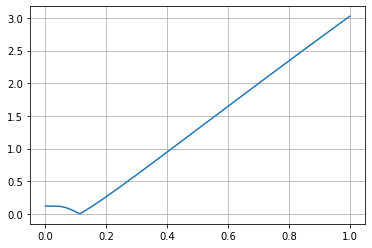

In [589]:
u = volatility_smile(df,2)

minError: 1.60867051404584e-05
Ind:  [2221]
implied_vol:  0.2222


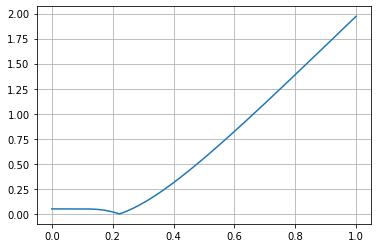

In [583]:
u = volatility_smile(df)

24
minError: 1.60867051404584e-05
Ind:  [2221]
Sigma[Ind]:  [0.2222]
implied_vol:  0.2222


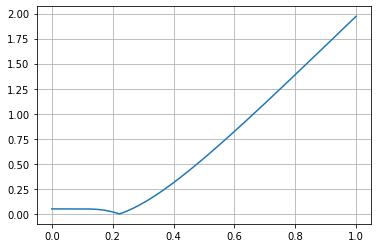

In [592]:
volatility_smile(df)

minError: 1.60867051404584e-05
Ind:  [2221]
Sigma[Ind]:  [0.2222]
implied_vol:  0.2222
minError: 4.272955625990449e-05
Ind:  [1517]
Sigma[Ind]:  [0.1518]
implied_vol:  0.15180000000000002
minError: 0.00012812650563531758
Ind:  [1123]
Sigma[Ind]:  [0.1124]
implied_vol:  0.1124
minError: 0.00017235454207914502
Ind:  [540]
Sigma[Ind]:  [0.0541]
implied_vol:  0.0541
minError: 0.6499999999999981
Ind:  [151, 157]
Sigma[Ind]:  [0.0152 0.0158]
multiple solutions for optimal implied volatility
implied_vol:  0.0152
minError: 1.2199999999999982
Ind:  [263, 267, 279]
Sigma[Ind]:  [0.0264 0.0268 0.028 ]
multiple solutions for optimal implied volatility
implied_vol:  0.0264
minError: 1.7199999999999982
Ind:  [384, 388]
Sigma[Ind]:  [0.0385 0.0389]
multiple solutions for optimal implied volatility
implied_vol:  0.0385
minError: 2.1699999999999964
Ind:  [475]
Sigma[Ind]:  [0.0476]
implied_vol:  0.0476
minError: 2.569999999999998
Ind:  [559, 560, 561, 562, 563, 564, 572, 573, 577, 584, 587, 589, 593, 6

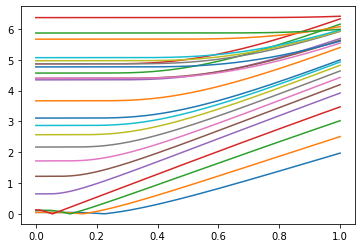

In [594]:
for i in range(24):
    volatility_smile(df,i)

minError: 2.5699999999999963
Ind:  [19485, 19486, 19487, 19657, 19658, 19659, 19769, 19770, 19771]
Sigma[Ind]:  [0.058458 0.058461 0.058464 0.058974 0.058977 0.05898  0.05931  0.059313
 0.059316]
multiple solutions for optimal implied volatility
implied_vol:  0.058458


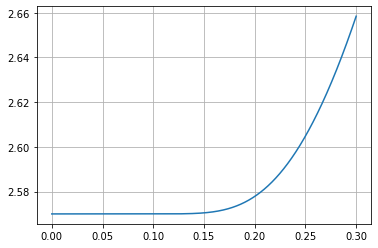

In [597]:
volatility_smile(df,8)

In [ ]:
# how to minimize with scipy

In [632]:
from scipy import optimize
from scipy.optimize import minimize
def f(x,y):
    return norm.cdf(x)-y

# célfüggvény
def objective_function(x0, a):
    """objective function, to be solved."""
    return abs(f(a,x0))


initial_guess = [0]  # initial guess can be anything
result = optimize.minimize(objective_function, 0.5, initial_guess,method='nelder-mead')
print(result)

 final_simplex: (array([[0.5       ],
       [0.50009766]]), array([0.000000e+00, 9.765625e-05]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 18
           nit: 9
        status: 0
       success: True
             x: array([0.5])


In [ ]:
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]   

In [631]:
norm.cdf(0)

0.5

In [633]:
from scipy.optimize import minimize

In [644]:
def o(x):
    return np.abs(x ** 2 - 4)
def c1(x):
    return x - 1
def c2(x):
    return 10 - x
    
x0 = 10 # initial guess

o(x0)
#b=(1,7)
bound=(b)
con1={'type': 'ineq', 'fun' : c1}
con2={'type': 'ineq', 'fun' : c2}
c=(con1,con2)
# method="SLSQP", bounds=bound)
s = minimize(o, x0, constraints=c)
x=s.x
x=x[0]
x

1.9999999960566366

In [649]:
def o(x):
    return np.abs(norm.cdf(x) - 1/2)
    
x0 = 1 # initial guess

o(x0)
#b=(1,7)
#bound=(b)
con1={'type': 'ineq', 'fun' : c1}
con2={'type': 'ineq', 'fun' : c2}
c=(con1,con2)
# method="SLSQP", bounds=bound)
s = minimize(o, x0)
x=s.x
x=x[0]
x

-7.4505805673858834e-09

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


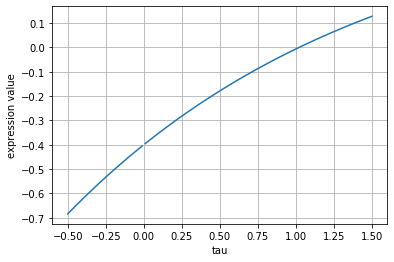

The solution is tau = 1.021651
at which the value of the expression is -0.000000


In [650]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the expression whose roots we want to find

a = 0.5
R = 1.6

func = lambda tau : R - ((1.0 - np.exp(-tau))/(1.0 - np.exp(-a*tau))) 

# Plot it

tau = np.linspace(-0.5, 1.5, 201)

plt.plot(tau, func(tau))
plt.xlabel("tau")
plt.ylabel("expression value")
plt.grid()
plt.show()

# Use the numerical solver to find the roots

tau_initial_guess = 0.5
tau_solution = fsolve(func, tau_initial_guess)

print("The solution is tau = %f" % tau_solution)
print("at which the value of the expression is %f" % func(tau_solution))

In [652]:
from scipy.optimize import minimize

# find solutions of -0.7353 + 3.306 * abs(0.706 - x) + 1.247 * abs(0.721 - y) = 0.89072 - 1.4829 * x + 0.23239 * y - z
f = lambda x: ((-0.7353 + 3.306 * (np.abs(0.706 - x[0])) + 1.247 * (np.abs(0.721 - x[1]))) - \
                (0.89072 - 1.4829 * x[0] + 0.23239 * x[1] - x[2]))**2
x0 = [1, 1, 1]
res = minimize(f, x0, tol=1e-6)
x=res.x
x

      fun: 1.5808871493702169e-18
 hess_inv: array([[ 0.03898428, -0.01508996,  0.00433191],
       [-0.01508996,  0.09405872,  0.10127539],
       [ 0.00433191,  0.10127539,  0.56141594]])
      jac: array([4.49424054e-08, 2.88924305e-08, 1.74158279e-08])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.24414812,  0.18485712, -0.88852078])


In [660]:
from scipy.optimize import minimize

# find solutions of -0.7353 + 3.306 * abs(0.706 - x) + 1.247 * abs(0.721 - y) = 0.89072 - 1.4829 * x + 0.23239 * y - z
f = lambda x: ((-0.7353 + 3.306 * (np.abs(0.706 - x[0])) + 1.247 * (np.abs(0.721 - x[1]))) - \
                (0.89072 - 1.4829 * x[0] + 0.23239 * x[1] - x[2]))**2
x0 = [1, 1, 1]
res = minimize(f, x0, tol=1e-10)
x=res.x
x

array([ 0.24414812,  0.18485712, -0.88852078])

In [655]:
f(x)

1.5808871493702169e-18

In [661]:
u = lambda x: -0.7353 + 3.306 * np.abs(0.706 - x[0]) + 1.247 * np.abs(0.721 - x[1])

In [662]:
u(x)

1.4601524758465136

In [663]:
v = lambda x: 0.89072 - 1.4829 * x[0] + 0.23239 * x[1] - x[2]

In [664]:
v(x)

1.4601524745891803

In [653]:
f(x)

1.5808871493702169e-18

In [665]:
10232111212322121212.21+10.23211121232212121221

1.0232111212322122e+19

In [667]:
int(2.9)

2

In [669]:
from scipy.optimize import minimize

g = lambda x: 1/2
# find solutions of -0.7353 + 3.306 * abs(0.706 - x) + 1.247 * abs(0.721 - y) = 0.89072 - 1.4829 * x + 0.23239 * y - z
f = lambda x: norm.cdf(x)
x0 = 1
res = minimize(f-g, x0, tol=1e-10)
x=res.x
x

TypeError: unsupported operand type(s) for -: 'function' and 'function'

In [ ]:
def objective(speed, a, b, c, d):
    ... # return stuff using a,b,c,d

# define a0, b0, c0, d0 as convenient
result = optimize.minimize(objective, x0, args=(a0,b0,c0,d0), method='nelder-mead')

In [606]:
norm.cdf(0.78326393)

0.783263929997124

In [574]:
df["Option Type"].drop_duplicates()

0      C
313    P
Name: Option Type, dtype: object

In [509]:
volatility_smile(df)
    

2020-03-18 00:00:00


,Expiry Date,Strike,Last Price,Implied Volatility,Option Type,Time to Expiry,Implied Price,Pricing Error
0,2020-03-18,10.0,8.10,265.14%,C,0.535714,3.558371,-4.541629
4,2020-03-18,11.0,7.10,232.23%,C,0.535714,2.970775,-4.129225
8,2020-03-18,12.0,6.20,205.66%,C,0.535714,2.466392,-3.733608
12,2020-03-18,13.0,5.40,183.50%,C,0.535714,2.038574,-3.361426
22,2020-03-18,14.0,4.62,168.12%,C,0.535714,1.679171,-2.940829
28,2020-03-18,15.0,4.00,156.54%,C,0.535714,1.379549,-2.620451
34,2020-03-18,16.0,3.60,92.82%,C,0.535714,1.131268,-2.468732
44,2020-03-18,17.0,3.10,140.92%,C,0.535714,0.926494,-2.173506
51,2020-03-18,18.0,2.75,137.21%,C,0.535714,0.758208,-1.991792
57,2020-03-18,19.0,2.45,132.91%,C,0.535714,0.620277,-1.829723


In [503]:
df

,Expiry Date,Strike,Last Price,Implied Volatility,Option Type,Time to Expiry,Implied Price,Pricing Error
0,2020-03-18,10.0,8.10,265.14%,C,0.535714,3.558371,-4.541629
1,2020-02-19,10.0,7.90,294.63%,C,0.424603,3.382450,-4.517550
2,2020-04-15,10.0,8.20,250.88%,C,0.646825,3.721204,-4.478796
3,2020-02-19,11.0,6.97,255.66%,C,0.424603,2.765039,-4.204961
4,2020-03-18,11.0,7.10,232.23%,C,0.535714,2.970775,-4.129225
...,...,...,...,...,...,...,...,...
552,2020-01-22,47.5,28.40,0.00%,P,0.313492,34.820058,6.420058
553,2020-03-18,80.0,60.80,0.00%,P,0.535714,67.320029,6.520029
554,2020-04-15,80.0,60.70,0.00%,P,0.646825,67.320177,6.620177
555,2020-04-15,75.0,55.70,0.00%,P,0.646825,62.320305,6.620305


In [686]:
def A(p):
    return np.matrix([[np.sqrt(np.abs(p)),2],[3, 1/np.sqrt(np.abs(p))]])

In [676]:
A(4)

matrix([[2. , 2. ],
        [3. , 0.5]])

In [691]:
x = np.linspace(-0.000001,0.000001,1001)
x

array([-1.00e-06, -9.98e-07, -9.96e-07, ...,  9.96e-07,  9.98e-07,
        1.00e-06])

In [692]:
y =np.array([np.linalg.det(A(p)) for p in x])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


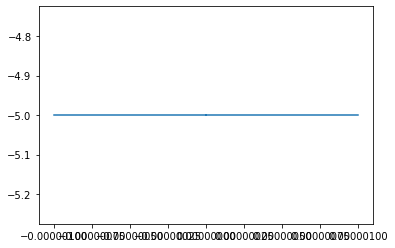

In [693]:
plt.plot(x,y)

In [690]:
y

array([-5., -5., -5., ..., -5., -5., -5.])

In [461]:
def plot_volatility_smile(x,y):
    plt.plot(x,y, label="RMS")
    plt.plot(x,y)
    #plt.plot(x,z)
    plt.title("Pricing errors") 
    plt.xticks(rotation=45)
    #plt.ylim(0, plt.ylim()[1]) #change only the first argument
    plt.grid()
    plt.legend(fontsize=8)
    plt.ylabel("Pricing errors (RMS)")
    plt.xlabel("Implied Volatility")
    plt.tight_layout()
    store=False
    if store:
        #p = os.path.join(platform_prefix(), ...)
        plt.savefig(p,dpi=1000)

In [462]:
def plot_pricing_errors(df):
    df.sort_values(by=["Pricing Error"],ascending=True,inplace=True)
    df.reset_index(drop=True,inplace=True)
    # plt.bar(df["Pricing Error"], height=500, align='center')
    plt.plot(df["Pricing Error"], label="Pricing Errors")
    #plt.plot(x,y)
    #plt.plot(x,z)
    plt.title("Pricing Errors") 
    plt.xticks(rotation=45)
    #plt.ylim(0, plt.ylim()[1]) #change only the first argument
    plt.grid()
    plt.legend(fontsize=8)
    plt.ylabel("Pricing errors")
    #plt.xlabel("Implied Volatility")
    plt.tight_layout()
    store=False
    if store:
        #p = os.path.join(platform_prefix(), ...)
        plt.savefig(p,dpi=1000)

In [300]:
ticker = "^VIX"
opts = options(ticker)
opts.head()

,Expiry Date,Contract Name,Strike,Last Price,Bid,Ask,Change,Change (%),Volume,Open Interest,Implied Volatility,Option Type
0,2019-11-06,VIXW191106C00010000,10.00,4.40,3.15,3.88,0.00,-,52,20,546.88%,C
1,2019-11-06,VIXW191106C00010500,10.50,3.20,2.70,3.40,-,-,4,-,496.09%,C
2,2019-11-06,VIXW191106C00011000,11.00,3.70,2.18,2.90,0.00,-,10,-,434.38%,C
3,2019-11-06,VIXW191106C00012000,12.00,1.70,1.40,1.70,-0.05,-2.86%,21,17,318.75%,C
4,2019-11-06,VIXW191106C00012500,12.50,1.20,0.00,0.00,0.00,-,74,80,6.25%,C


In [ ]:
# Now, we have the table entries for the two options nearest to the money in HTML. 
# Let’s scrape the pricing data, volume, and implied volatility from the first call option:

In [66]:
itm_call_data = [] 
for td in BeautifulSoup(str(itm_call), "html.parser").find_all("td"):
    itm_call_data.append(td.text)
print(itm_call_data)

['SPY191104C00325000', '2019-10-28 9:45AM EDT', '325.00', '0.01', '0.00', '0.01', '0.00', '-', '1', '0', '25.00%']
